In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
y = pd.read_csv("y.csv")
y.drop('Unnamed: 0', axis = 1, inplace = True)
y = np.ravel(y)

In [4]:
macro = pd.read_csv("Macro_dataset.csv")
macro.drop('Unnamed: 0', axis = 1, inplace = True)
macro.head()

,Year,Month,Economic Sentiment Indicator,Active Population Rate,Unemployment Rate,Indicator of Financial Stress,AP financing of Residents,Vehicle Registration,Loan to Individuals,Deposits from non-financial Corporations,...,Exports of Goods,Import of Goods,IPC-Global Index,IPC - Miscellaneous Goods and Services,Technological balance of payments - credits,Technological balance of payments - debits,Consumer confidence indicator,Retail confidence indicator,Reserve assets,monetary gold
0,2008,5,92.5,0.7,7.2,0.273,-971,0.0,7.9,5.1,...,17093,27463,93.994,94.666,79.00,76.58,-24,-6,8026.42,6975.05
1,2008,6,94.2,0.7,7.2,0.398,-484,-9.4,7.8,2.3,...,20458,32916,94.465,94.828,75.97,75.99,-32,-12,8303.74,7277.23
2,2008,7,96.8,0.7,7.2,0.475,619,-1.4,7.3,2.3,...,24352,38947,93.918,94.987,90.86,92.91,-30,-18,8305.71,7185.08
3,2008,8,94.0,0.7,7.2,0.464,1026,-7.0,6.7,3.4,...,26791,43609,93.444,95.033,57.92,66.56,-27,-10,8129.05,6982.05
4,2008,9,98.2,0.3,7.6,0.623,456,0.2,6.3,2.8,...,30135,49124,93.943,95.059,74.80,75.36,-24,-11,8707.86,7713.16


In [5]:
X_raw = pd.read_csv("X_raw.csv")
X_raw.drop('Unnamed: 0', axis = 1, inplace = True)
X_raw.head()

,age,job,marital,education,default,balance,housing,loan,year,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,2008,5,5,261,1,-1,0,other
1,44,technician,single,secondary,0,29,1,0,2008,5,5,151,1,-1,0,other
2,33,entrepreneur,married,secondary,0,2,1,1,2008,5,5,76,1,-1,0,other
3,47,blue-collar,married,primary,0,1506,1,0,2008,5,5,92,1,-1,0,other
4,33,unemployed,single,primary,0,1,0,0,2008,5,5,198,1,-1,0,other


In [6]:
X_new_add_raw = X_raw.merge(macro, how = "left", left_on = ['year', 'month'], right_on = ['Year', 'Month'])
X_new_add_raw.drop(['Year', 'Month'], axis = 1, inplace = True)
X_new_add_raw.head()

,age,job,marital,education,default,balance,housing,loan,year,day,...,Exports of Goods,Import of Goods,IPC-Global Index,IPC - Miscellaneous Goods and Services,Technological balance of payments - credits,Technological balance of payments - debits,Consumer confidence indicator,Retail confidence indicator,Reserve assets,monetary gold
0,58,management,married,tertiary,0,2143,1,0,2008,5,...,17093,27463,93.994,94.666,79.0,76.58,-24,-6,8026.42,6975.05
1,44,technician,single,secondary,0,29,1,0,2008,5,...,17093,27463,93.994,94.666,79.0,76.58,-24,-6,8026.42,6975.05
2,33,entrepreneur,married,secondary,0,2,1,1,2008,5,...,17093,27463,93.994,94.666,79.0,76.58,-24,-6,8026.42,6975.05
3,47,blue-collar,married,primary,0,1506,1,0,2008,5,...,17093,27463,93.994,94.666,79.0,76.58,-24,-6,8026.42,6975.05
4,33,unemployed,single,primary,0,1,0,0,2008,5,...,17093,27463,93.994,94.666,79.0,76.58,-24,-6,8026.42,6975.05


In [7]:
len(X_raw.columns)

16

In [8]:
X_select = X_new_add_raw.iloc[:, 16:]
X_select.drop_duplicates(inplace = True)
len(X_select)

30

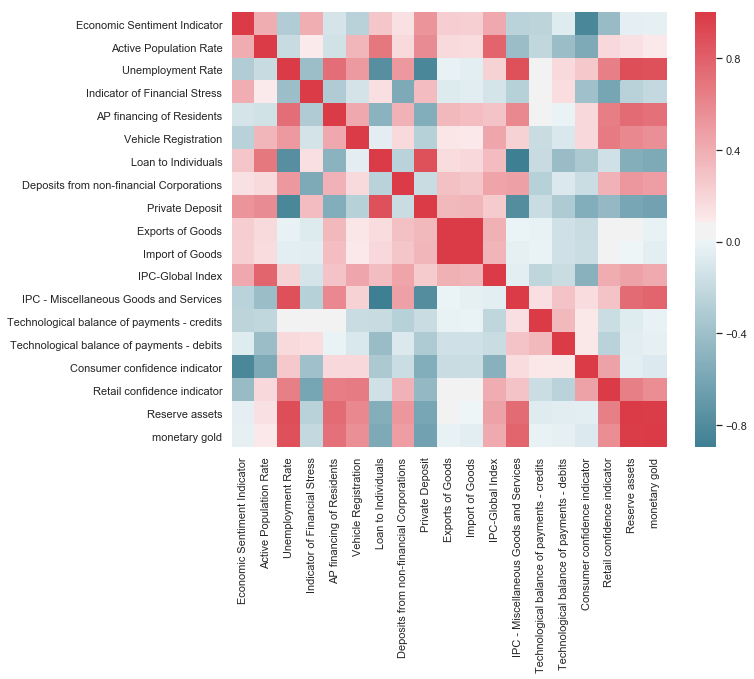

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_select.corr()
_ = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [9]:
X_select.columns

Index(['Economic Sentiment Indicator', 'Active Population Rate',
       'Unemployment Rate', 'Indicator of Financial Stress',
       'AP financing of Residents', 'Vehicle Registration',
       'Loan to Individuals', 'Deposits from non-financial Corporations',
       'Private Deposit', 'Exports of Goods', 'Import of Goods',
       'IPC-Global Index', 'IPC - Miscellaneous Goods and Services',
       'Technological balance of payments - credits',
       'Technological balance of payments - debits',
       'Consumer confidence indicator', 'Retail confidence indicator',
       'Reserve assets', 'monetary gold'],
      dtype='object')

In [10]:
X_new_add_select = X_new_add_raw.drop(['Consumer confidence indicator', 'Reserve assets', 'monetary gold', \
                                      'IPC - Miscellaneous Goods and Services', 'Loan to Individuals',\
                                      'Private Deposit'], axis = 1)
X_new_add_select.head()

,age,job,marital,education,default,balance,housing,loan,year,day,...,Indicator of Financial Stress,AP financing of Residents,Vehicle Registration,Deposits from non-financial Corporations,Exports of Goods,Import of Goods,IPC-Global Index,Technological balance of payments - credits,Technological balance of payments - debits,Retail confidence indicator
0,58,management,married,tertiary,0,2143,1,0,2008,5,...,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
1,44,technician,single,secondary,0,29,1,0,2008,5,...,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
2,33,entrepreneur,married,secondary,0,2,1,1,2008,5,...,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
3,47,blue-collar,married,primary,0,1506,1,0,2008,5,...,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
4,33,unemployed,single,primary,0,1,0,0,2008,5,...,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6


In [11]:
X_select = X_new_add_raw.iloc[:, 16:]
X_select = X_select.drop(['Consumer confidence indicator', 'Reserve assets', 'monetary gold', \
                                      'IPC - Miscellaneous Goods and Services', 'Loan to Individuals',\
                                      'Private Deposit'], axis = 1)
X_select.head()

,Economic Sentiment Indicator,Active Population Rate,Unemployment Rate,Indicator of Financial Stress,AP financing of Residents,Vehicle Registration,Deposits from non-financial Corporations,Exports of Goods,Import of Goods,IPC-Global Index,Technological balance of payments - credits,Technological balance of payments - debits,Retail confidence indicator
0,92.5,0.7,7.2,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
1,92.5,0.7,7.2,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
2,92.5,0.7,7.2,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
3,92.5,0.7,7.2,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6
4,92.5,0.7,7.2,0.273,-971,0.0,5.1,17093,27463,93.994,79.0,76.58,-6


In [12]:
from sklearn.feature_selection import SelectKBest

SK = SelectKBest(k=5)
X_selected = SK.fit_transform(X_select, y)
X_selected.shape

(45211, 5)

In [13]:
mask = SK.get_support() #list of booleans
new_features = [] # The list of K best features

for bool, feature in zip(mask, X_select.columns):
    if bool:
        new_features.append(feature)
new_features

['Economic Sentiment Indicator',
 'Active Population Rate',
 'Unemployment Rate',
 'AP financing of Residents',
 'Technological balance of payments - debits']

In [14]:
X_new_add_select.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'year', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Economic Sentiment Indicator',
       'Active Population Rate', 'Unemployment Rate',
       'Indicator of Financial Stress', 'AP financing of Residents',
       'Vehicle Registration', 'Deposits from non-financial Corporations',
       'Exports of Goods', 'Import of Goods', 'IPC-Global Index',
       'Technological balance of payments - credits',
       'Technological balance of payments - debits',
       'Retail confidence indicator'],
      dtype='object')

In [27]:
X_final = X_new_add_select.drop(['Indicator of Financial Stress', 'Vehicle Registration', \
                                 'Deposits from non-financial Corporations', 'Exports of Goods', \
                                 'Import of Goods', 'IPC-Global Index', 'Technological balance of payments - credits', \
                                 'Retail confidence indicator'], axis = 1)
X_final.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'year', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Economic Sentiment Indicator',
       'Active Population Rate', 'Unemployment Rate',
       'AP financing of Residents',
       'Technological balance of payments - debits'],
      dtype='object')

In [28]:
duration = X_final[['duration']]
duration.head()

,duration
0,261
1,151
2,76
3,92
4,198


In [30]:
duration.to_csv('duration.csv')

In [29]:
X_final.drop('duration', axis = 1, inplace = True)
X_final.head()

,age,job,marital,education,default,balance,housing,loan,year,day,month,campaign,pdays,previous,poutcome,Economic Sentiment Indicator,Active Population Rate,Unemployment Rate,AP financing of Residents,Technological balance of payments - debits
0,58,management,married,tertiary,0,2143,1,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
1,44,technician,single,secondary,0,29,1,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
2,33,entrepreneur,married,secondary,0,2,1,1,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
3,47,blue-collar,married,primary,0,1506,1,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58
4,33,unemployed,single,primary,0,1,0,0,2008,5,5,1,-1,0,other,92.5,0.7,7.2,-971,76.58


In [31]:
X_final.to_csv('X_final.csv')

In [36]:
y = y.reshape(-1,1)
duration = np.array(duration).reshape(-1,1)
duration_y = np.append(duration, y, axis = 1)
duration_y = pd.DataFrame(duration_y, columns = ['duration', 'y'])
duration_y.head()

,duration,y
0,261,0
1,151,0
2,76,0
3,92,0
4,198,0


In [37]:
duration_y.to_csv('duration_y.csv')